# RAPIDS cuML 
## Performance, Boundaries, and Correctness Benchmarks

**Description:** This notebook provides a simple and unified means of benchmarking single GPU cuML algorithms against their skLearn counterparts with the `cuml.benchmark` package in RAPIDS cuML. This enables quick and simple measurements of performance, validation of correctness, and investigation of upper bounds.

Each benchmark returns a Pandas `DataFrame` with the results. At the end of the notebook, these results are used to draw charts and output to a CSV file. 

Please refer to the [table of contents](#table_of_contents) for algorithms available to be benchmarked with this notebook.

In [2]:
import cuml
import pandas as pd

from cuml.benchmark.runners import SpeedupComparisonRunner
from cuml.benchmark.algorithms import algorithm_by_name

import warnings
warnings.filterwarnings('ignore', 'Expected column ')

print(cuml.__version__)

24.02.00


In [3]:
N_REPS = 3  # Number of times each test is repeated

DATA_NEIGHBORHOODS = "blobs"
DATA_CLASSIFICATION = "classification"
DATA_REGRESSION = "regression"

INPUT_TYPE = "numpy"

benchmark_results = []

In [4]:
SMALL_ROW_SIZES = [2**x for x in range(14, 17)]
LARGE_ROW_SIZES = [2**x for x in range(18, 24, 2)]

SKINNY_FEATURES = [32, 256]
WIDE_FEATURES = [1000, 10000]

VERBOSE=True
RUN_CPU=True

In [5]:
def enrich_result(algorithm, runner, result):
    result["algo"] = algorithm
    result["dataset_name"] = runner.dataset_name
    result["input_type"] = runner.input_type
    return result

def execute_benchmark(algorithm, runner, verbose=VERBOSE, run_cpu=RUN_CPU, **kwargs):
    results = runner.run(algorithm_by_name(algorithm), verbose=verbose, run_cpu=run_cpu, **kwargs)
    results = [enrich_result(algorithm, runner, result) for result in results]
    benchmark_results.extend(results)

## Table of Contents<a id="table_of_contents"/>

### Benchmarks
1. [Neighbors](#neighbors)<br>
    1.1 [Nearest Neighbors - Brute Force](#nn_bruteforce)<br>
    1.2 [KNeighborsClassifier](#kneighborsclassifier)<br>
    1.3 [KNeighborsRegressor](#kneighborsregressor)<br>
2. [Clustering](#clustering)<br>
    2.1 [DBSCAN - Brute Force](#dbscan_bruteforce)<br>
    2.2 [K-Means](#kmeans)<br>
3. [Manifold Learning](#manifold_learning)<br>
    3.1 [UMAP - Unsupervised](#umap_unsupervised)<br>
    3.2 [UMAP - Supervised](#umap_supervised)<br>
    3.3 [T-SNE](#tsne)<br>
4. [Linear Models](#linear_models)<br>
    4.1 [Linear Regression](#linear_regression)<br>
    4.2 [Logistic Regression](#logistic_regression)<br>
    4.3 [Ridge Regression](#ridge_regression)<br>
    4.4 [Lasso Regression](#lasso_regression)<br>
    4.5 [ElasticNet Regression](#elasticnet_regression)<br>
    4.6 [Mini-batch SGD Classifier](#minibatch_sgd_classifier)<br>
5. [Decomposition](#decomposition)<br>
    5.1 [PCA](#pca)<br>
    5.2 [Truncated SVD](#truncated_svd)<br>
6. [Ensemble](#ensemble)<br>
    6.1 [Random Forest Classifier](#random_forest_classifier)<br>
    6.2 [Random Forest Regressor](#random_forest_regressor)<br>
    6.3 [FIL](#fil)<br>
    6.4 [Sparse FIL](#sparse_fil)<br>
7. [Random Projection](#random_projection)<br>
    7.1 [Gaussian Random Projection](#gaussian_random_projection)<br>
    7.2 [Sparse Random Projection](#sparse_random_projection)<br>
8. [SVM](#svm)<br>
    8.1 [SVC - Linear Kernel](#svc_linear_kernel)<br>
    8.2 [SVC - RBF Kernel](#svc_rbf_kernel)<br>
    8.3 [SVR - Linear Kernel](#svr_linear_kernel)<br>
    8.4 [SVR - RBF Kernel](#svr_rbf_kernel)<br>
    
### Chart & Store Results
9. [Convert to Pandas DataFrame](#convert_to_pandas)<br>
10. [Chart Results](#chart_results)<br>
11. [Output to CSV](#output_csv)<br>

## Neighbors<a id="neighbors"/>


### Nearest Neighbors - Brute Force<a id="nn_bruteforce"/>

In [5]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS,
)

execute_benchmark("NearestNeighbors", runner)

NearestNeighbors (n_samples=16384, n_features=32) [cpu=0.19321250915527344, gpu=0.03139305114746094, speedup=6.15462664803451]
NearestNeighbors (n_samples=16384, n_features=256) [cpu=0.956498384475708, gpu=0.06869888305664062, speedup=13.923055833194514]
NearestNeighbors (n_samples=32768, n_features=32) [cpu=0.7519340515136719, gpu=0.07145333290100098, speedup=10.523428662949579]
NearestNeighbors (n_samples=32768, n_features=256) [cpu=3.959327459335327, gpu=0.2133345603942871, speedup=18.559240715698657]
NearestNeighbors (n_samples=65536, n_features=32) [cpu=2.8915209770202637, gpu=0.18265891075134277, speedup=15.830166538968083]
NearestNeighbors (n_samples=65536, n_features=256) [cpu=16.07307767868042, gpu=0.7307829856872559, speedup=21.994323887500872]


### KNeighborsClassifier<a id="kneighborsclassifier"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsClassifier", runner)

### KNeighborsRegressor<a id="kneighborsregressor"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("KNeighborsRegressor", runner)

## Clustering<a id="clustering"/>

### DBSCAN - Brute Force<a id="dbscan_bruteforce"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("DBSCAN", runner)

### K-means Clustering<a id="kmeans"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type="numpy",
    n_reps=N_REPS
)

execute_benchmark("KMeans", runner)

## Manifold Learning<a id="manifold_learning"/>

### UMAP - Unsupervised<a id="umap_unsupervised"/>
CPU benchmark requires UMAP-learn

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Unsupervised", runner)

### UMAP - Supervised<a id="umap_supervised"/>
CPU benchmark requires UMAP-learn

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("UMAP-Supervised", runner)

### T-SNE<a id="tsne"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES, 
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("TSNE", runner, run_cpu=True)

## Linear Models<a id="linear_models"/>

### Linear Regression<a id="linear_regression"/>

In [6]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LinearRegression", runner)

Failed to run with 16384 samples, 32 features: Data must be 1-dimensional
Failed to run with 16384 samples, 256 features: Data must be 1-dimensional
Failed to run with 32768 samples, 32 features: Data must be 1-dimensional
Failed to run with 32768 samples, 256 features: Data must be 1-dimensional
Failed to run with 65536 samples, 32 features: Data must be 1-dimensional
Failed to run with 65536 samples, 256 features: Data must be 1-dimensional


### Logistic Regression<a id="logistic_regression"/>

In [7]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("LogisticRegression", runner)

LogisticRegression (n_samples=16384, n_features=32) [cpu=0.02394556999206543, gpu=0.025500774383544922, speedup=0.9390134445296284]
LogisticRegression (n_samples=16384, n_features=256) [cpu=0.08084535598754883, gpu=0.02698802947998047, speedup=2.9956005512562283]
LogisticRegression (n_samples=32768, n_features=32) [cpu=0.036760568618774414, gpu=0.027305126190185547, speedup=1.3462881791034351]
LogisticRegression (n_samples=32768, n_features=256) [cpu=0.1889491081237793, gpu=0.040017127990722656, speedup=4.721705869736184]
LogisticRegression (n_samples=65536, n_features=32) [cpu=0.14465785026550293, gpu=0.04127621650695801, speedup=3.5046296028880866]
LogisticRegression (n_samples=65536, n_features=256) [cpu=0.32404398918151855, gpu=0.029479026794433594, speedup=10.992357089709165]


### Ridge Regression<a id="ridge_regression"/>

In [8]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Ridge", runner)

Failed to run with 16384 samples, 32 features: Data must be 1-dimensional
Failed to run with 16384 samples, 256 features: Data must be 1-dimensional
Failed to run with 32768 samples, 32 features: Data must be 1-dimensional
Failed to run with 32768 samples, 256 features: Data must be 1-dimensional
Failed to run with 65536 samples, 32 features: Data must be 1-dimensional
Failed to run with 65536 samples, 256 features: Data must be 1-dimensional


### Lasso Regression<a id="lasso_regression"/>

In [9]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Lasso", runner)

Failed to run with 16384 samples, 32 features: Data must be 1-dimensional
Failed to run with 16384 samples, 256 features: Data must be 1-dimensional
Failed to run with 32768 samples, 32 features: Data must be 1-dimensional
Failed to run with 32768 samples, 256 features: Data must be 1-dimensional
Failed to run with 65536 samples, 32 features: Data must be 1-dimensional
Failed to run with 65536 samples, 256 features: Data must be 1-dimensional


### ElasticNet Regression<a id="elasticnet_regression"/>

In [10]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("ElasticNet", runner)

Failed to run with 16384 samples, 32 features: Data must be 1-dimensional
Failed to run with 16384 samples, 256 features: Data must be 1-dimensional
Failed to run with 32768 samples, 32 features: Data must be 1-dimensional
Failed to run with 32768 samples, 256 features: Data must be 1-dimensional
Failed to run with 65536 samples, 32 features: Data must be 1-dimensional
Failed to run with 65536 samples, 256 features: Data must be 1-dimensional


### Mini-batch SGD Classifier<a id="minibatch_sgd_classifier"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("MBSGDClassifier", runner)

## Decomposition<a id="decomposition"/>

### PCA<a id="pca"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("PCA", runner)

### Truncated SVD<a id="truncated_svd"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("TSVD", runner)

## Ensemble<a id="ensemble"/>

### Random Forest Classifier<a id="random_forest_classifier"/>

In [11]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestClassifier", runner)

RandomForestClassifier (n_samples=16384, n_features=32) [cpu=0.7865993976593018, gpu=0.39292001724243164, speedup=2.0019326151407806]
RandomForestClassifier (n_samples=16384, n_features=256) [cpu=3.0330774784088135, gpu=0.4282975196838379, speedup=7.0817068486592705]
RandomForestClassifier (n_samples=32768, n_features=32) [cpu=1.5647621154785156, gpu=0.41583824157714844, speedup=3.762910572014366]
RandomForestClassifier (n_samples=32768, n_features=256) [cpu=7.004270315170288, gpu=0.5207679271697998, speedup=13.449888039834104]
RandomForestClassifier (n_samples=65536, n_features=32) [cpu=4.055113077163696, gpu=0.5220019817352295, speedup=7.7683863645187]
RandomForestClassifier (n_samples=65536, n_features=256) [cpu=18.392724752426147, gpu=0.676708459854126, speedup=27.179687921133656]


### Random Forest Regressor<a id="random_forest_regressor"/>

In [12]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("RandomForestRegressor", runner)

Failed to run with 16384 samples, 32 features: Data must be 1-dimensional
Failed to run with 16384 samples, 256 features: Data must be 1-dimensional
Failed to run with 32768 samples, 32 features: Data must be 1-dimensional
Failed to run with 32768 samples, 256 features: Data must be 1-dimensional
Failed to run with 65536 samples, 32 features: Data must be 1-dimensional
Failed to run with 65536 samples, 256 features: Data must be 1-dimensional


### FIL<a id="fil"/>
CPU benchmark requires XGBoost Library

In [13]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("FIL", runner)

/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "fil_algo", "num_rounds", "output_class", "precision", "silent", "storage_type", "threshold" } are not used.

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_m

FIL (n_samples=16384, n_features=32) [cpu=0.022415876388549805, gpu=0.0022711753845214844, speedup=9.86972496325845]


/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:10] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "fil_algo", "num_rounds", "output_class", "precision", "silent", "storage_type", "threshold" } are

FIL (n_samples=16384, n_features=256) [cpu=0.03056812286376953, gpu=0.004277706146240234, speedup=7.145914613755434]
FIL (n_samples=32768, n_features=32) [cpu=0.03991198539733887, gpu=0.003232240676879883, speedup=12.348085859703474]


/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


FIL (n_samples=32768, n_features=256) [cpu=0.08741116523742676, gpu=0.006888866424560547, speedup=12.68875891188482]


/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "fil_algo", "num_rounds", "output_class", "precision", "silent", "storage_type", "threshold" } are not used.

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:12] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not

FIL (n_samples=65536, n_features=32) [cpu=0.07652521133422852, gpu=0.004161834716796875, speedup=18.38737396883593]


/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "fil_algo", "num_rounds", "output_class", "precision", "silent", "storage_type", "threshold" } are not used.

  warnings.warn(smsg, UserWarning)
/home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [15:17:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_m

FIL (n_samples=65536, n_features=256) [cpu=0.17517995834350586, gpu=0.013036012649536133, speedup=13.438154982899574]


## Sparse FIL<a id="sparse_fil"/>
Requires TreeLite library

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("Sparse-FIL-SKL", runner)

## Random Projection<a id="random_projection"/>

### Gaussian Random Projection<a id="gaussian_random_projection"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("GaussianRandomProjection", runner)

### Sparse Random Projection<a id="sparse_random_projection"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES,
    bench_dims=WIDE_FEATURES,
    dataset_name=DATA_NEIGHBORHOODS,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SparseRandomProjection", runner)

## SVM<a id="svm"/>

### SVC - Linear Kernel<a id="svc_linear_kernel"/>

In [16]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVC-Linear", runner, run_cpu=True)

[W] [15:01:49.625803] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
SVC-Linear (n_samples=16384, n_features=32) [cpu=0.27545595169067383, gpu=0.15064501762390137, speedup=1.828510202563579]
SVC-Linear (n_samples=16384, n_features=256) [cpu=15.33716106414795, gpu=0.18590426445007324, speedup=82.5003186963843]
SVC-Linear (n_samples=32768, n_features=32) [cpu=2.412944793701172, gpu=0.08975672721862793, speedup=26.883163730154305]
SVC-Linear (n_samples=32768, n_features=256) [cpu=111.44811677932739, gpu=0.30434679985046387, speedup=366.18790417407286]
SVC-Linear (n_samples=65536, n_features=32) [cpu=34.696784257888794, gpu=0.269028902053833, speedup=128.97047117616353]
Failed to run with 65536 samples, 256 features: The work in this thread was cancelled.
Obtained 64 stack frames
#0 in /home/andre/arbeit/sentiment-in-marketing/.venv/lib/python3.10/site-packages/pylibraft/common/h

### SVC - RBF Kernel<a id="svc_rbf_kernel"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_CLASSIFICATION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVC-RBF", runner, run_cpu=True)

### SVR - Linear Kernel<a id="svr_linear_kernel"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

# Due to extreme high runtime, the CPU benchmark 
# is disabled. Use run_cpu=True to re-enable. 

execute_benchmark("SVR-Linear", runner, run_cpu=False)

### SVR - RBF Kernel<a id="svr_rbf_kernel"/>

In [ ]:
runner = cuml.benchmark.runners.SpeedupComparisonRunner(
    bench_rows=SMALL_ROW_SIZES, 
    bench_dims=SKINNY_FEATURES,
    dataset_name=DATA_REGRESSION,
    input_type=INPUT_TYPE,
    n_reps=N_REPS
)

execute_benchmark("SVR-RBF", runner)

## Charting & Storing Results<a id="charting_and_storing_results"/>

### Convert Results to Pandas DataFrame<a id="convert_to_pandas"/>

In [14]:
%matplotlib inline

In [15]:
df = pd.DataFrame(benchmark_results)

### Chart Results<a id="chart_results"/>

In [16]:
def chart_single_algo_speedup(df, algorithm):
    df = df.loc[df.algo == algorithm]
    df = df.pivot(index="n_samples", columns="n_features", values="speedup")
    axes = df.plot.bar(title="%s Speedup" % algorithm)

In [17]:
def chart_all_algo_speedup(df):
    df = df[["algo", "n_samples", "speedup"]].groupby(["algo", "n_samples"]).mean()
    df.plot.bar()

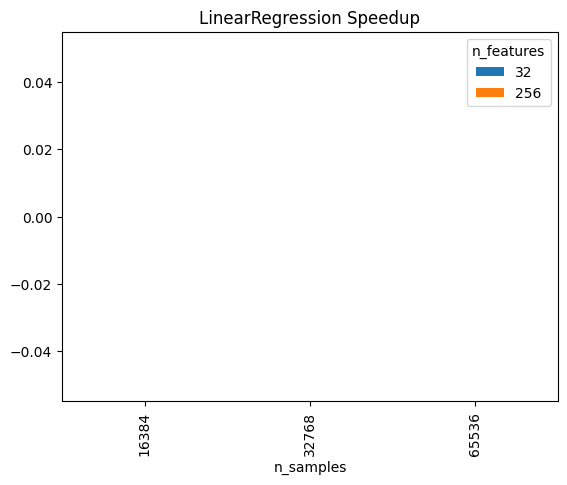

In [18]:
chart_single_algo_speedup(df, "LinearRegression")

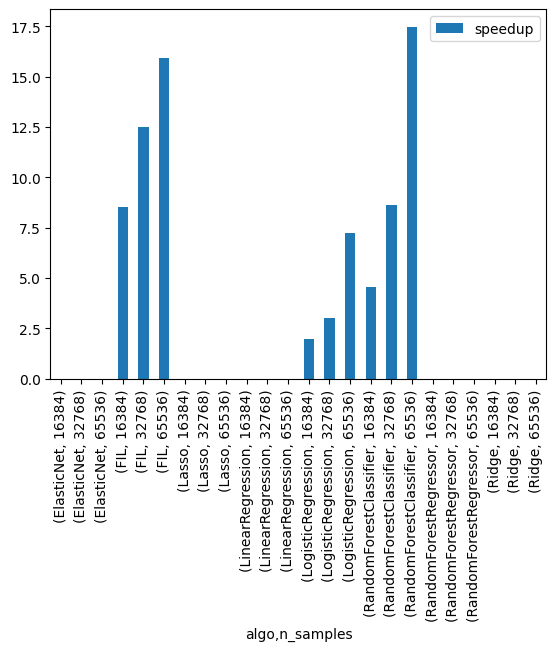

In [19]:
chart_all_algo_speedup(df)

### Output Results to CSV<a id="output_csv"/>

In [ ]:
df.to_csv("benchmark_results.csv")